In [87]:
from sage.all import *

In [160]:
# Declare variables to take values in complex numbers
x,y,z,a = var('x, y, z, a', domain = CC)

# Also want one real time parameter
t = var('t', domain = RR)

# Equation of affine surface
G = x*y*z + x + z + 1

# Define Lefschetz fibration from Casals-Murphy p.40
f = -3*x - 2*z + y

# Find critical points of L.F.
sols = solve([G ==0, G.diff(x) == a*f.diff(x), G.diff(y) == a*f.diff(y), G.diff(z) == a*f.diff(z)], [x,y,z,a])

# Return number of critical points
len(sols)

5

In [161]:
sols

[[x == -1.210170340681363, y == 0.2369743074494043, z == 0.2946778212887148, a == -0.356610337972167], [x == (-0.4568151346149874 + 0.3861842963170672*I), y == (2.19182013437076 - 0.1000639011015501*I), z == (-0.4575762604493643 + 0.5896692639631476*I), a == (-0.01869324874961215 - 0.4460786103486786*I)], [x == (-0.4568151346149872 - 0.3861842963170672*I), y == (2.191820134370761 + 0.1000639011015502*I), z == (-0.4575762604493643 - 0.5896692639631476*I), a == (-0.01869324874961228 + 0.4460786103486787*I)], [x == 0.8050810337275515, y == -3.359709153122327, z == 1.058798999165972, a == 0.8524190741385311], [x == 0.3187196003680821, y == -0.2609053497942387, z == -1.438324282389449, a == -0.4584221748400853]]

In [162]:
# Make a list of the critical points as complex numbers
values = []
for sol in sols:
    values.append(f.subs(sol)) # Note: here we plug the 5 critical points into the Lefschetz function

# Return the list of critical points
values

[3.2781296869160643,
 4.477418059114451 - 2.4379553179790467*I,
 4.477418059114451 + 2.437955317979047*I,
 -7.892550252636926,
 1.6595844138804132]

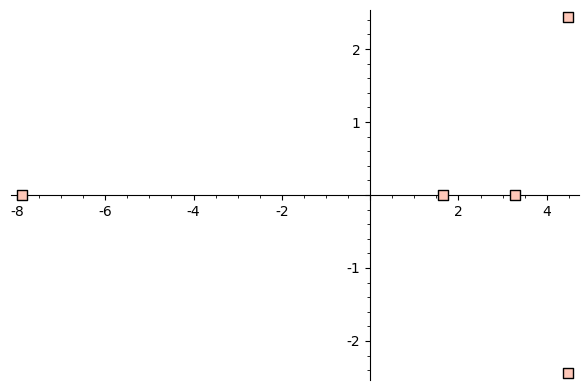

In [163]:
# Plot the critical points as complex numbers in the plane
plot_points = []
for value in values:
    plot_points.append([value.real(), value.imag()])
    
# Return the list of critical points as a list of points in the plane
plot_points

# Plot the critical points
scatter_plot(plot_points, marker = 's')

In [164]:
# We see that 0 is a regular value of the fibration f. Solve for a regular fiber.
fiber = G.subs(y == 3*x + 2*z).simplify()
fiber

(3*x + 2*z)*x*z + x + z + 1

In [165]:
# Define a branch cover on the regular fiber
rho = 3*x + z
fiber_sols = solve([fiber == 0, fiber.diff(x) == a*rho.diff(x), fiber.diff(z) == a*rho.diff(z)], [x,z,a])

# Return the number of branch points in branch cover
len(fiber_sols)

6

In [166]:
# Make a list of the branch points as complex numbers in the plane
fiber_points = []
for fiber_sol in fiber_sols:
    fiber_points.append(rho.subs(fiber_sol))

# Return the list of critical points
fiber_points

[-1,
 1.8474487771876147,
 -1.0193085497120713 - 1.7799091525906945*I,
 -1.0193085497120715 + 1.7799091525906947*I,
 0.5955841427778825 - 2.536171792111155*I,
 0.5955841427778789 + 2.536171792111159*I]

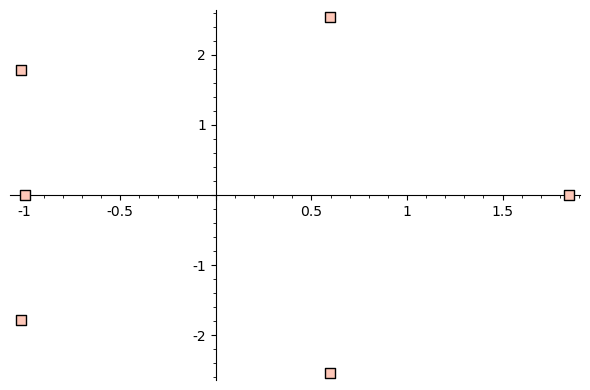

In [167]:
# Plot the branch points as complex numbers in the plane
branch_points = []
for fiber_point in fiber_points:
    branch_points.append([fiber_point.real(), fiber_point.imag()])
    
# Return the list of critical points as a list of points in the plane
branch_points

# Plot the critical points
scatter_plot(branch_points, marker = 's')

In [168]:
# Construct time-dependent fiber F_t as vanishing path approaches the first critical value s1
tfiber = G.subs(y == 3*x +2*z + t*values[4]).simplify()
tfiber

(1.659584413880413*t + 3*x + 2*z)*x*z + x + z + 1

In [169]:
# Define a branch cover for t = 0 which should be the same as before
tfiber0 = tfiber.subs(t == 0).simplify()

tfiber0_sols = solve([tfiber0 == 0, tfiber0.diff(x) == a*rho.diff(x), tfiber0.diff(z) == a*rho.diff(z)], [x,z,a])

# Return the number of branch points in branch cover
len(tfiber0_sols)

6

In [170]:
# Now we make a fiber at each time t = s as the parameter s approaches 1
tfiber_sols = []
for s in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    tfiber_at_s = tfiber.subs(t == s).simplify()
    tfiber_sols.append(solve([tfiber_at_s == 0, tfiber_at_s.diff(x) == a*rho.diff(x), tfiber_at_s.diff(z) == a*rho.diff(z)], [x,z,a]))

In [171]:
tfiber_sols[0][0][0]

x == 0

In [172]:
tfiber_sols[0][0][1]

z == -1

In [173]:
tfiber_sols[1]

[[x == 1.007194934765925, z == -1.35462463708005, a == -1.247007299270073], [x == (-0.6210780605496719 - 0.8405570746510841*I), z == (0.7316120568776138 + 0.7755920508673401*I), a == (0.7246968898988567 - 1.393847783928937*I)], [x == (-0.6210780605496719 + 0.8405570746510841*I), z == (0.7316120568776138 - 0.7755920508673401*I), a == (0.7246968898988567 + 1.393847783928937*I)], [x == (0.0572592700981213 - 0.4320752380644677*I), z == (0.3770099342193194 - 1.231037869248947*I), a == (-1.581983169864289 - 1.153688357373098*I)], [x == (0.0572592700981213 + 0.4320752380644677*I), z == (0.3770099342193254 + 1.231037869248947*I), a == (-1.581983169864287 + 1.153688357373108*I)], [x == 0.009803688845633441, z == -1.028577709386678, a == 0.9615798922800718]]

In [174]:
# Make a list (of lists) of the branch points at each time t = s as the parameter s approaches 1 as complex numbers in the plane
tfiber_points = []
for i in range(len(tfiber_sols)):
    for j in range(len(tfiber_sols[i])):
        tfiber_points.append(3*tfiber_sols[i][j][0].rhs() + tfiber_sols[i][j][1].rhs())

# Return the list of critical points
len(tfiber_points)

66

In [175]:
# Plot the branch points as complex numbers in the plane
tbranch_points = []
for i in range(len(tfiber_points)):
    tbranch_points.append([tfiber_points[i].real(), tfiber_points[i].imag()])

In [176]:
len(tbranch_points)

66

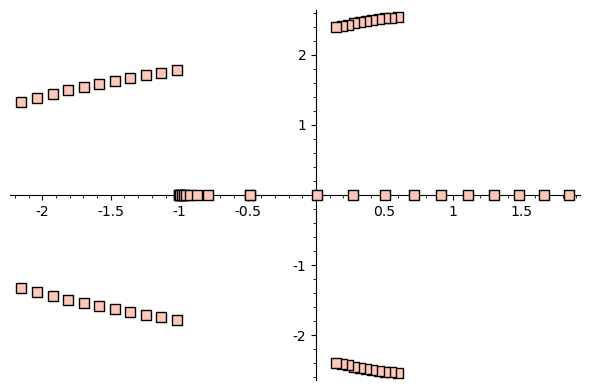

In [177]:
# Plot the critical points
scatter_plot(tbranch_points, marker = 's')